# CM4125 Topic 7 Lab Part 2 (BCR)

In [1]:
# Importing the necessary files
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
# This helps that charts appear in the notebook
%matplotlib inline

In [2]:
# Import and show dataframe created during the lecture
# You can download it from moodle or use dropbox link
df = pd.read_csv('https://www.dropbox.com/s/wkvlf6hclrlrr46/city_populations_updated.csv?raw=1')
df

,City,Continent,Year,Population
0,Agra,Asia,1575,200.0
1,Agra,Asia,1576,212.0
2,Agra,Asia,1577,224.0
3,Agra,Asia,1578,236.0
4,Agra,Asia,1579,248.0
...,...,...,...,...
6247,Vijayanagar,Asia,1561,480.0
6248,Vijayanagar,Asia,1562,480.0
6249,Vijayanagar,Asia,1563,480.0
6250,Vijayanagar,Asia,1564,480.0


In [3]:
## Create colours dictionary
colours = dict(zip(
    ['Europe', 'Asia', 'South America', 'North America', 'Africa'],
    ['#adb0ff', '#90d595','#aafbff', '#f7bb5f', '#eafb50']))
group_lk = df.set_index('City')['Continent'].to_dict()

In [4]:
def draw_barchart(year):
    dff = df[df['Year'].eq(year)].sort_values(by='Population', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['City'], dff['Population'], color=[colours[group_lk[x]] for x in dff['City']])
    dx = dff['Population'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Population'], dff['City'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in the world ',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)

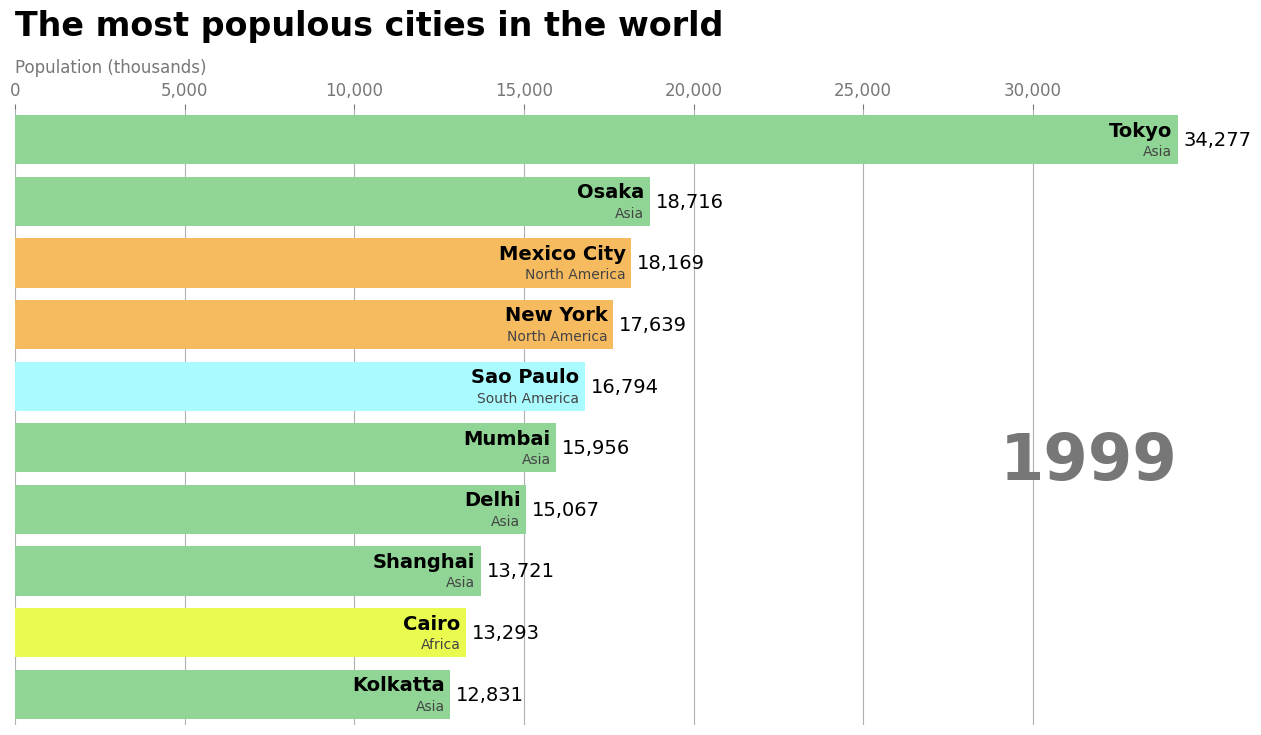

In [5]:
# Draw barchart for a given year
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(1999)

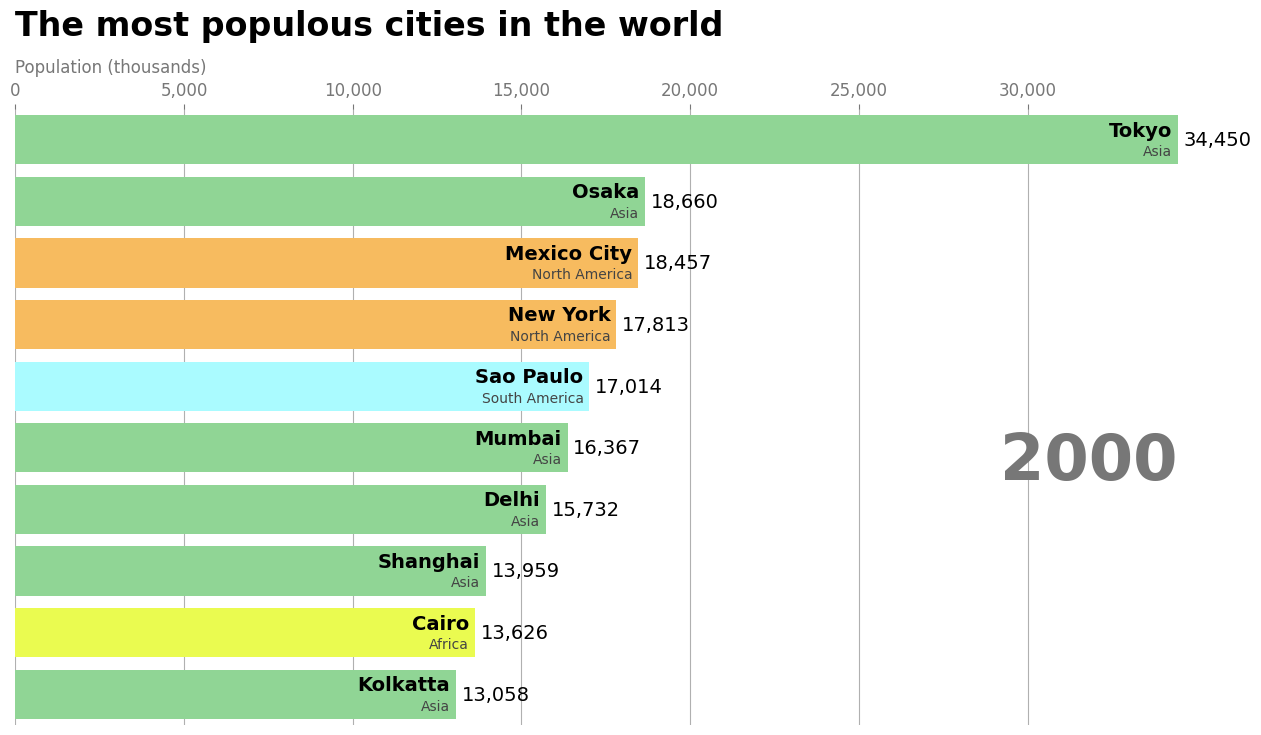

In [6]:
# Draw the animation
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2000,2020))
HTML(animator.to_jshtml())

Challenges:
    Can you change colours, styles, names, etc.?
    Can you skip some years?
    Can you get rid of the static plot that gets printed after the animation?
    Can you show not only the top 12 cities?
    Can you show all cities at the same time?
    Can you put the years of the range in the title of the chart?
    Can you run it from 1500 to 2020?
    Can you make the chart go back in time?

Alternatively you can download the dataset from Moodle and see if other tools are able to these things!
* You can try to install [this Python Module](https://pypi.org/project/bar-chart-race/) which in fact looks easier and better than my proposed method!
    * Although it doesn't allow you to include the continent to colour the bars!
* Using [an app by Microsoft](https://appsource.microsoft.com/en-us/product/power-bi-visuals/WA200000053?tab=Overview)
* Using online services such as [Fluorish](https://app.flourish.studio/@flourish/bar-chart-race) or [Highcharts](https://www.highcharts.com/blog/tutorials/bar-chart-race/)
* Or with [Excel](https://help.xlstat.com/s/article/bar-chart-race-tutorial-in-excel?language=en_US)!